Any null values: False


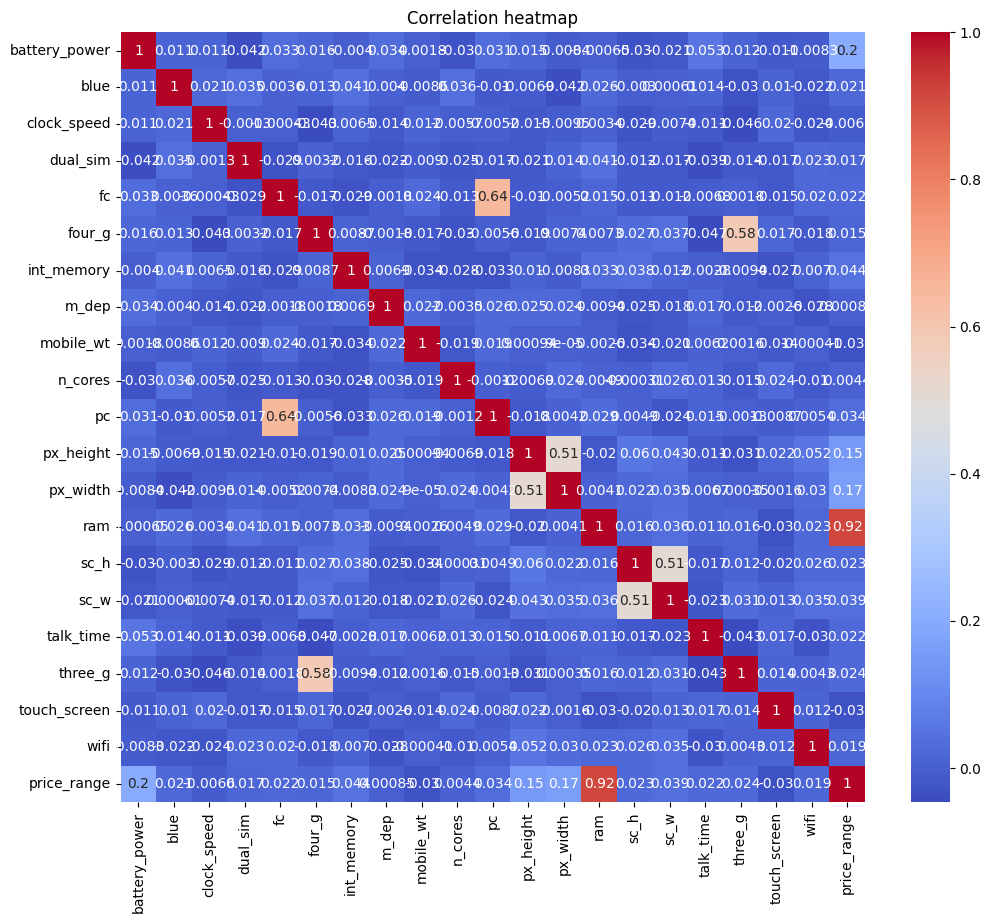

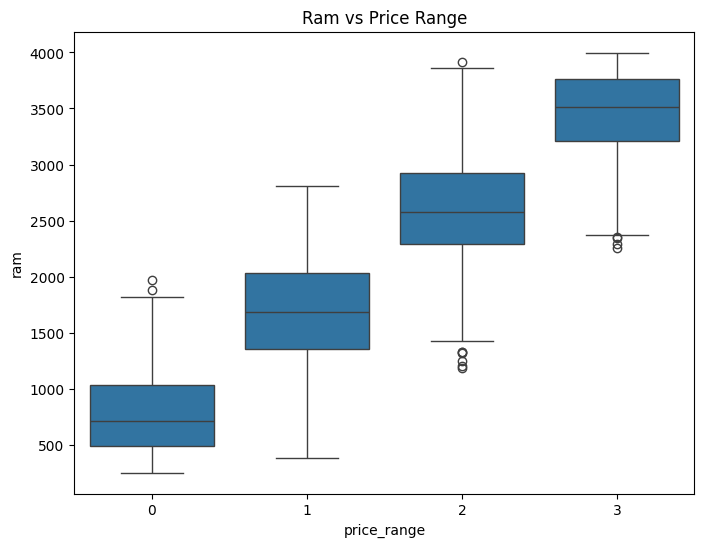

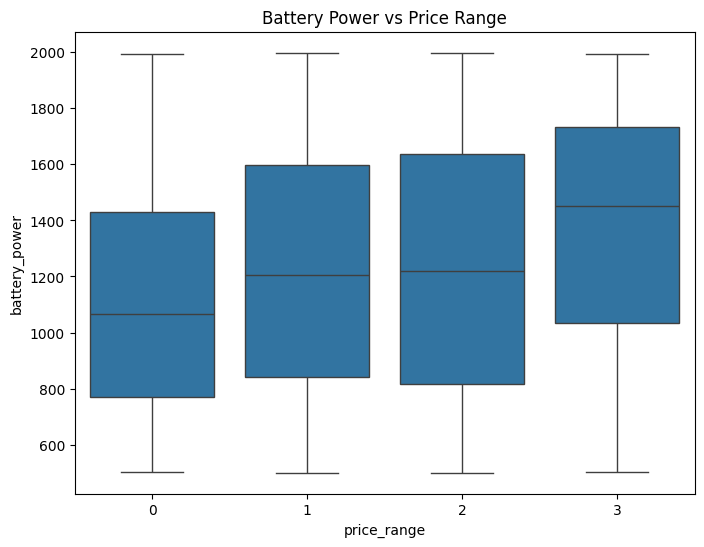

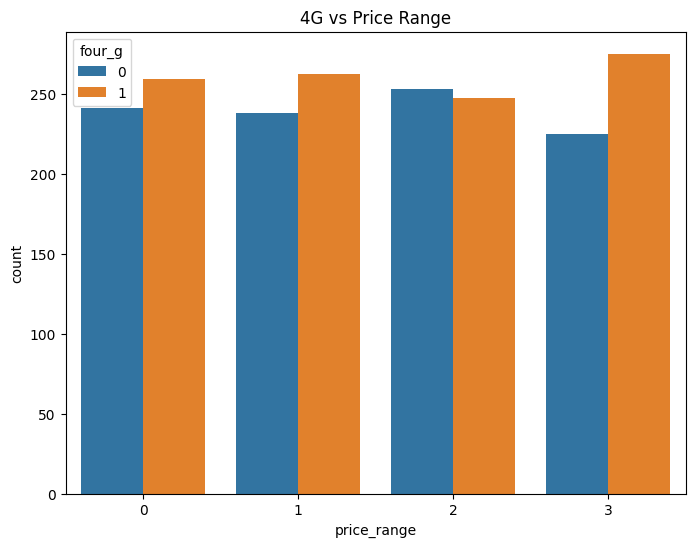

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle
import matplotlib.pyplot as plt
import seaborn as sn
data = pd.read_csv("D:\\Datasets\\mobile_dataset.csv")

print("Any null values:", data.isnull().values.any())

data = data.dropna(subset=["price_range"])

X = data.drop("price_range", axis=1)
Y = data["price_range"]

plt.figure(figsize=(12,10))
sn.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

plt.figure(figsize=(8,6))
sn.boxplot(x="price_range",y="ram",data=data)
plt.title("Ram vs Price Range")
plt.show()

plt.figure(figsize=(8,6))
sn.boxplot(x="price_range",y="battery_power",data=data)
plt.title("Battery Power vs Price Range")
plt.show()

plt.figure(figsize=(8,6))
sn.countplot(x="price_range",hue="four_g",data=data)
plt.title("4G vs Price Range")
plt.show()

sn.pairplot(data[["battery_power","ram","px_height","px_width","price_range"]],hue="price_range")
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
print("\n🔸 Random Forest Classifier:")
print("Accuracy:", accuracy_score(Y_test, rf_pred))
print("Classification Report:\n", classification_report(Y_test, rf_pred))

with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
print("\n🔸 Decision Tree Classifier:")
print("Accuracy:", accuracy_score(Y_test, dt_pred))
print("Classification Report:\n", classification_report(Y_test, dt_pred))

with open("dt_model.pkl", "wb") as f:
    pickle.dump(dt, f)

lr = LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
print("\n🔸 Logistic Regression:")
print("Accuracy:", accuracy_score(Y_test, lr_pred))
print("Classification Report:\n", classification_report(Y_test, lr_pred))

with open("lr_model.pkl", "wb") as f:
    pickle.dump(lr, f)
